In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sklearn.metrics as metrics

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [4]:
# Data download
# ==============================================================================
url = ('https://raw.githubusercontent.com/arifpras/forecastingDemand/main/20230126_database.csv')
data = pd.read_csv(url, sep=',', header=0, names=['month', 'incoming_bid_avg_sun', 'incoming_bid_avg_sbn', 'dpk_bankumum', 'dv_bankindonesia', 'vix_index', 'bfcius_bberg'])

# Data preparation
# ==============================================================================
data = data.rename(columns={'month': 'date'})
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')
data = data.set_index('date')
# data = data.rename(columns={'incoming_bid_avg_sun': 'incoming_bid_avg_sun'})
data = data.asfreq('MS')
data = data.sort_index()
data.head()

,incoming_bid_avg_sun,incoming_bid_avg_sbn,dpk_bankumum,dv_bankindonesia,vix_index,bfcius_bberg
date,,,,,,
2012-01-01,38.90175,38.901750,2770.57007,0,20.403182,-1.200591
2012-02-01,32.32425,18.457750,2763.94286,0,18.390000,-0.785571
2012-03-01,12.35250,8.043250,2825.97490,0,16.167273,-0.655591
2012-04-01,17.16300,11.396250,2841.36139,0,17.769524,-0.710952
2012-05-01,14.01525,8.320625,2908.95747,0,21.034783,-0.828000


In [9]:
# creating new dataframe from incoming_bid_avg_sun column
data_incbid = data[['incoming_bid_avg_sun']]
# inserting new column with dpk_bankumum values
# data_incbid.loc[:,'dpk_bankumum_t-1'] = data[['dpk_bankumum']].shift()
data_incbid.loc[:,'dpk_bankumum'] = data[['dpk_bankumum']]
# inserting new column with dv_bankindonesia values
data_incbid.loc[:,'dv_bankindonesia'] = data[['dv_bankindonesia']]
# inserting new column with dpk_bankumum values
data_incbid.loc[:,'vix_index'] = data[['vix_index']]

# dropping NAs
data_incbid = data_incbid.dropna()

data_incbid

/var/folders/9k/ff8g4yqn45s139zzyc224r800000gn/T/ipykernel_4017/1253595847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_incbid.loc[:,'dpk_bankumum'] = data[['dpk_bankumum']]
/var/folders/9k/ff8g4yqn45s139zzyc224r800000gn/T/ipykernel_4017/1253595847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_incbid.loc[:,'dv_bankindonesia'] = data[['dv_bankindonesia']]
/var/folders/9k/ff8g4yqn45s139zzyc224r800000gn/T/ipykernel_4017/1253595847.py:9: SettingWithCopyWarning: 
A value is trying to be se

,incoming_bid_avg_sun,dpk_bankumum,dv_bankindonesia,vix_index
date,,,,
2012-01-01,38.90175,2770.57007,0,20.403182
2012-02-01,32.32425,2763.94286,0,18.390000
2012-03-01,12.35250,2825.97490,0,16.167273
2012-04-01,17.16300,2841.36139,0,17.769524
2012-05-01,14.01525,2908.95747,0,21.034783
...,...,...,...,...
2022-02-01,74.42140,7384.39407,1,25.574737
2022-03-01,52.09540,7481.67500,1,26.924783
2022-04-01,48.74260,7485.68711,1,24.232500


In [10]:
# Use stock symbols to extract training data
X = data_incbid[['dpk_bankumum', 'dv_bankindonesia', 'vix_index']]
y = data_incbid[['incoming_bid_avg_sun']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-0.22179714 -0.05695816 -0.75283523]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.8, shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-0.4180996765645075


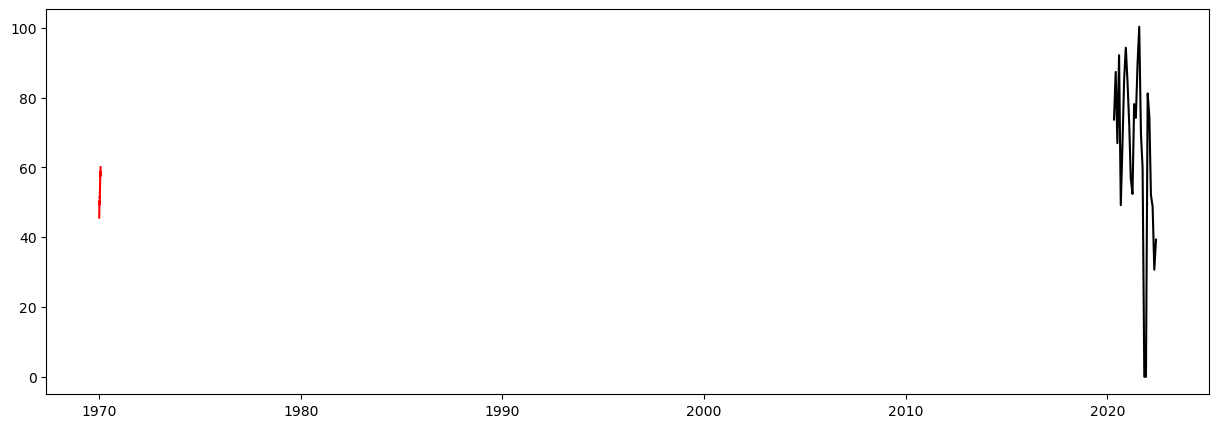

In [13]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()